In [1]:
!pip install -q -U watermark
!pip install pandas
!pip install matplot


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using ca

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqt5<5.13, which is not installed.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.
sphinx 5.0.2 requires docutils<0.19,>=0.14, but you have docutils 0.22.4 which is incompatible.

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%reload_ext watermark
%watermark -a "Data Science Academy"

Author: Data Science Academy



In [3]:
%watermark --iversion

### Importações de bibliotecas usadas

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import random
from datetime import datetime, timedelta

%matplotlib inline

In [5]:
# Definição da função para gerar dados fictícios de vendas
def dsa_gera_dados_ficticios(num_registros = 600):

    """
    Gera um DataFrame do Pandas com dados de vendas fictícios.
    """

    # Mensagem inicial indicando a quantidade de registros a serem gerados
    print(f"\nIniciando a geração de {num_registros} registros de vendas...")

    # Dicionário com produtos, suas categorias e preços
    produtos = {
        'Laptop Gamer': {'categoria': 'Eletrônicos', 'preco': 7500.00},
        'Mouse Vertical': {'categoria': 'Acessórios', 'preco': 250.00},
        'Teclado Mecânico': {'categoria': 'Acessórios', 'preco': 550.00},
        'Monitor Ultrawide': {'categoria': 'Eletrônicos', 'preco': 2800.00},
        'Cadeira Gamer': {'categoria': 'Móveis', 'preco': 1200.00},
        'Headset 7.1': {'categoria': 'Acessórios', 'preco': 800.00},
        'Placa de Vídeo': {'categoria': 'Hardware', 'preco': 4500.00},
        'SSD 1TB': {'categoria': 'Hardware', 'preco': 600.00}
    }

    # Cria uma lista apenas com os nomes dos produtos
    lista_produtos = list(produtos.keys())

    # Dicionário com cidades e seus respectivos estados
    cidades_estados = {
        'São Paulo': 'SP', 'Rio de Janeiro': 'RJ', 'Belo Horizonte': 'MG',
        'Porto Alegre': 'RS', 'Salvador': 'BA', 'Curitiba': 'PR', 'Fortaleza': 'CE'
    }

    # Cria uma lista apenas com os nomes das cidades
    lista_cidades = list(cidades_estados.keys())

    # Lista que armazenará os registros de vendas
    dados_vendas = []

    # Define a data inicial dos pedidos
    data_inicial = datetime(2026, 1, 1)

    # Loop para gerar os registros de vendas
    for i in range(num_registros):

        # Seleciona aleatoriamente um produto
        produto_nome = random.choice(lista_produtos)

        # Seleciona aleatoriamente uma cidade
        cidade = random.choice(lista_cidades)

        # Gera uma quantidade de produtos vendida entre 1 e 7
        quantidade = np.random.randint(1, 8)

        # Calcula a data do pedido a partir da data inicial
        data_pedido = data_inicial + timedelta(days = int(i/5), hours = random.randint(0, 23))

        # Se o produto for Mouse ou Teclado, aplica desconto aleatório de até 10%
        if produto_nome in ['Mouse Vertical', 'Teclado Mecânico']:
            preco_unitario = produtos[produto_nome]['preco'] * np.random.uniform(0.9, 1.0)
        else:
            preco_unitario = produtos[produto_nome]['preco']

        # Adiciona um registro de venda à lista
        dados_vendas.append({
            'ID_Pedido': 1000 + i,
            'Data_Pedido': data_pedido,
            'Nome_Produto': produto_nome,
            'Categoria': produtos[produto_nome]['categoria'],
            'Preco_Unitario': round(preco_unitario, 2),
            'Quantidade': quantidade,
            'ID_Cliente': np.random.randint(100, 150),
            'Cidade': cidade,
            'Estado': cidades_estados[cidade]
        })

    # Mensagem final indicando que a geração terminou
    print("Geração de dados concluída.\n")

    # Retorna os dados no formato de DataFrame
    return pd.DataFrame(dados_vendas)

In [6]:
df_vendas = dsa_gera_dados_ficticios(500)


Iniciando a geração de 500 registros de vendas...
Geração de dados concluída.



In [7]:
type(df_vendas)


pandas.core.frame.DataFrame

In [8]:
df_vendas.shape

(500, 9)

In [9]:
df_vendas.head()

,ID_Pedido,Data_Pedido,Nome_Produto,Categoria,Preco_Unitario,Quantidade,ID_Cliente,Cidade,Estado
0,1000,2026-01-01 12:00:00,Laptop Gamer,Eletrônicos,7500.0,2,112,Porto Alegre,RS
1,1001,2026-01-01 02:00:00,SSD 1TB,Hardware,600.0,1,136,São Paulo,SP
2,1002,2026-01-01 09:00:00,SSD 1TB,Hardware,600.0,7,135,Porto Alegre,RS
3,1003,2026-01-01 06:00:00,Cadeira Gamer,Móveis,1200.0,1,135,Curitiba,PR
4,1004,2026-01-01 02:00:00,Cadeira Gamer,Móveis,1200.0,2,106,Curitiba,PR


In [10]:
df_vendas.tail()

,ID_Pedido,Data_Pedido,Nome_Produto,Categoria,Preco_Unitario,Quantidade,ID_Cliente,Cidade,Estado
495,1495,2026-04-10 14:00:00,Mouse Vertical,Acessórios,249.15,6,125,Porto Alegre,RS
496,1496,2026-04-10 23:00:00,SSD 1TB,Hardware,600.00,1,119,Fortaleza,CE
497,1497,2026-04-10 22:00:00,Teclado Mecânico,Acessórios,529.34,6,136,Curitiba,PR
498,1498,2026-04-10 21:00:00,Laptop Gamer,Eletrônicos,7500.00,5,105,Porto Alegre,RS
499,1499,2026-04-10 02:00:00,Teclado Mecânico,Acessórios,517.43,4,143,Fortaleza,CE


In [11]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID_Pedido       500 non-null    int64         
 1   Data_Pedido     500 non-null    datetime64[ns]
 2   Nome_Produto    500 non-null    object        
 3   Categoria       500 non-null    object        
 4   Preco_Unitario  500 non-null    float64       
 5   Quantidade      500 non-null    int64         
 6   ID_Cliente      500 non-null    int64         
 7   Cidade          500 non-null    object        
 8   Estado          500 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 35.3+ KB


In [12]:
df_vendas.describe()

,ID_Pedido,Data_Pedido,Preco_Unitario,Quantidade,ID_Cliente
count,500.000000,500,500.000000,500.000000,500.000000
mean,1249.500000,2026-02-19 22:47:24,2208.880100,3.978000,124.734000
min,1000.000000,2026-01-01 02:00:00,225.240000,1.000000,100.000000
25%,1124.750000,2026-01-26 02:30:00,546.695000,2.000000,111.750000
50%,1249.500000,2026-02-19 22:00:00,800.000000,4.000000,126.000000
75%,1374.250000,2026-03-16 22:30:00,4500.000000,6.000000,136.250000
max,1499.000000,2026-04-10 23:00:00,7500.000000,7.000000,149.000000
std,144.481833,NaN,2403.339856,1.978217,14.528365


In [13]:
df_vendas.dtypes

ID_Pedido                  int64
Data_Pedido       datetime64[ns]
Nome_Produto              object
Categoria                 object
Preco_Unitario           float64
Quantidade                 int64
ID_Cliente                 int64
Cidade                    object
Estado                    object
dtype: object

## 1. Definição do Problema de Negócio

**1.1. O Problema de Negócio**

Nossa loja de e-commerce está em fase de crescimento, registrando um volume cada vez maior de transações diárias. No entanto, essa grande quantidade de dados de vendas, em seu estado bruto, é como um baú de tesouro trancado: sabemos que há valor ali, mas não conseguimos acessá-lo.

Atualmente, muitas de nossas decisões estratégicas são baseadas em intuição e observações parciais, o que nos leva a enfrentar os seguintes desafios:

- Gestão de Estoque Ineficiente: Não temos clareza sobre quais produtos são nossos "campeões de venda" e quais estão parados nas prateleiras. Isso resulta em excesso de estoque de itens de baixa procura e falta de produtos de alta demanda.

- Marketing com Baixo Retorno: Nossas campanhas de marketing são genéricas, pois não sabemos quais categorias de produtos atraem mais os clientes ou em quais regiões geográficas nosso público está mais concentrado.

- Perda de Oportunidades Sazonais: Não conseguimos identificar padrões ou tendências de vendas ao longo dos meses. Isso nos impede de planejar promoções estratégicas para períodos de alta ou de criar ações para impulsionar as vendas em meses de baixa.

- Expansão sem Direção: Temos o desejo de expandir, mas não sabemos quais mercados regionais são mais promissores ou onde nossos esforços logísticos deveriam ser focados.

O problema central é a falta de visibilidade clara sobre a performance do negócio, o que nos impede de tomar decisões rápidas, inteligentes e baseadas em evidências.

**1.2. Objetivos do Projeto**

Este projeto de análise de dados visa transformar nossos dados brutos de vendas em insights acionáveis. O objetivo é responder a quatro perguntas de negócio fundamentais:

- O que vender? Identificar os produtos de maior sucesso para otimizar nosso portfólio e estoque.
<!-- Trabalho Desenvolvido no Curso da Data Science Academy - www.datascienceacademy.com.br -->
- Onde focar? Compreender quais categorias de produtos geram a maior parte da nossa receita.

- Quando agir? Analisar a performance de vendas ao longo do tempo para identificar tendências, picos e sazonalidades.

- Para onde expandir? Mapear a distribuição geográfica de nossas vendas para descobrir nossos mercados mais fortes.

**1.3. Solução Proposta**

A solução consiste em consolidar, limpar e analisar o histórico de dados de vendas da nossa plataforma. Utilizando ferramentas de análise de dados (como Python com Pandas, NumPy e Matplotlib), vamos processar essas informações e criar um relatório visual que apresente as descobertas de forma clara e intuitiva para as equipes de gestão, marketing e operações.

**1.4. Resultados Esperados e Benefícios de Negócio**

Ao final deste projeto, esperamos alcançar os seguintes resultados:

- Otimização de Estoque: Com a lista dos produtos mais e menos vendidos, poderemos ajustar nossas compras, reduzir custos com armazenamento e evitar a perda de vendas por falta de produto.

- Marketing Direcionado e Eficaz: Sabendo quais categorias e regiões são mais lucrativas, a equipe de marketing poderá criar campanhas segmentadas, aumentando o retorno sobre o investimento (ROI).

- Planejamento Estratégico: A visualização das tendências mensais permitirá um melhor planejamento financeiro, promocional e de recursos, antecipando períodos de alta e baixa demanda.

- Decisões Baseadas em Dados: Substituiremos a intuição por dados concretos, criando uma cultura orientada a dados que impulsionará o crescimento sustentável do negócio.
-

## Limpeza e preprocessamento de dados

In [14]:
#formata a data do pedido
df_vendas["Data_Pedido"] = pd.to_datetime(df_vendas["Data_Pedido"])

#cria coluna de faturamento
df_vendas["Faturamento"] = df_vendas["Preco_Unitario"] * df_vendas["Quantidade"]

#cria coluna status entrega
df_vendas["Status_pedido"] = df_vendas["Estado"].apply(lambda estado: "Rádipada" if estado in ["SP", 'RJ', 'MG'] else 'Normal')

In [15]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID_Pedido       500 non-null    int64         
 1   Data_Pedido     500 non-null    datetime64[ns]
 2   Nome_Produto    500 non-null    object        
 3   Categoria       500 non-null    object        
 4   Preco_Unitario  500 non-null    float64       
 5   Quantidade      500 non-null    int64         
 6   ID_Cliente      500 non-null    int64         
 7   Cidade          500 non-null    object        
 8   Estado          500 non-null    object        
 9   Faturamento     500 non-null    float64       
 10  Status_pedido   500 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 43.1+ KB


## 6. Análise 1 - Top 10 Produtos Mais Vendidos
<!-- Trabalho Desenvolvido no Curso da Data Science Academy - www.datascienceacademy.com.br -->
Quais os top 10 produtos mais vendidos?

In [16]:
top_produtos = df_vendas.groupby('Nome_Produto')['Quantidade'].sum().sort_values(ascending=False).head(10)

In [17]:
top_produtos

Nome_Produto
Headset 7.1          290
Placa de Vídeo       277
Mouse Vertical       269
SSD 1TB              247
Teclado Mecânico     247
Laptop Gamer         244
Monitor Ultrawide    216
Cadeira Gamer        199
Name: Quantidade, dtype: int64

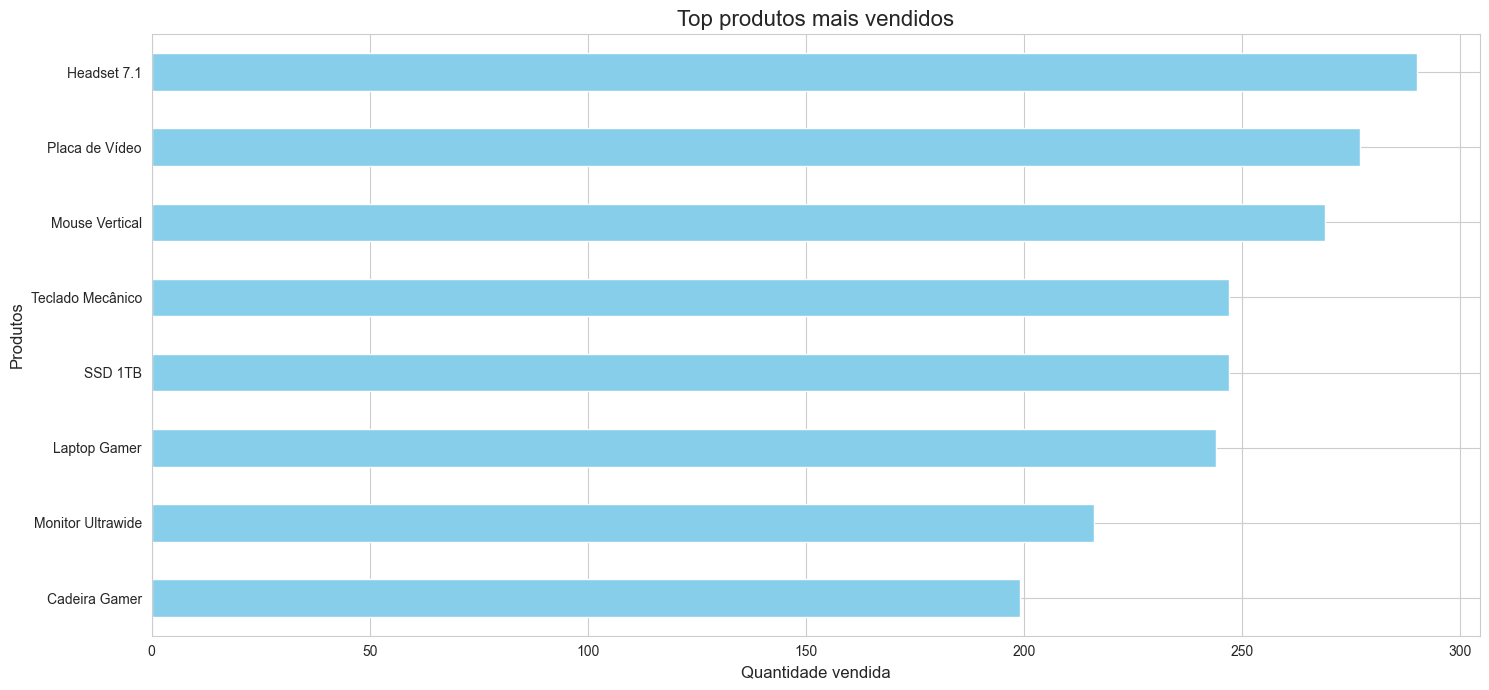

In [18]:
#Mostra o Grafico
#288 8
#defini um estilo para os graficos
sns.set_style("whitegrid")

#cria a figura e os eixos
plt.figure(figsize=(15, 7))

#Cria o grafico de barras horizontais
top_produtos.sort_values(ascending=True).plot(kind = 'barh', color= 'skyblue')

#Adiciona titulo e labels
plt.title("Top produtos mais vendidos", fontsize = 16)
plt.ylabel("Produtos", fontsize = 12)
plt.xlabel("Quantidade vendida", fontsize = 12)

#exibe o grafico
plt.tight_layout()
plt.show()

## 7. Análise 2 - Faturamento Mensal

Qual foi o faturamento mensal?

In [19]:
df_vendas.head()

,ID_Pedido,Data_Pedido,Nome_Produto,Categoria,Preco_Unitario,Quantidade,ID_Cliente,Cidade,Estado,Faturamento,Status_pedido
0,1000,2026-01-01 12:00:00,Laptop Gamer,Eletrônicos,7500.0,2,112,Porto Alegre,RS,15000.0,Normal
1,1001,2026-01-01 02:00:00,SSD 1TB,Hardware,600.0,1,136,São Paulo,SP,600.0,Rádipada
2,1002,2026-01-01 09:00:00,SSD 1TB,Hardware,600.0,7,135,Porto Alegre,RS,4200.0,Normal
3,1003,2026-01-01 06:00:00,Cadeira Gamer,Móveis,1200.0,1,135,Curitiba,PR,1200.0,Normal
4,1004,2026-01-01 02:00:00,Cadeira Gamer,Móveis,1200.0,2,106,Curitiba,PR,2400.0,Normal


In [20]:
df_vendas['Mês'] = df_vendas['Data_Pedido'].dt.month.astype(str) + " " + df_vendas['Data_Pedido'].dt.month_name()

In [21]:
faturamento_mes = df_vendas.groupby('Mês')['Faturamento'].sum()

In [22]:
faturamento_mes.map('R$ {:,.2f}'.format)

Mês
1 January     R$ 1,411,503.22
2 February    R$ 1,217,413.31
3 March       R$ 1,450,174.34
4 April         R$ 415,195.72
Name: Faturamento, dtype: object

In [23]:
faturamento_mes.head(5)

Mês
1 January     1411503.22
2 February    1217413.31
3 March       1450174.34
4 April        415195.72
Name: Faturamento, dtype: float64

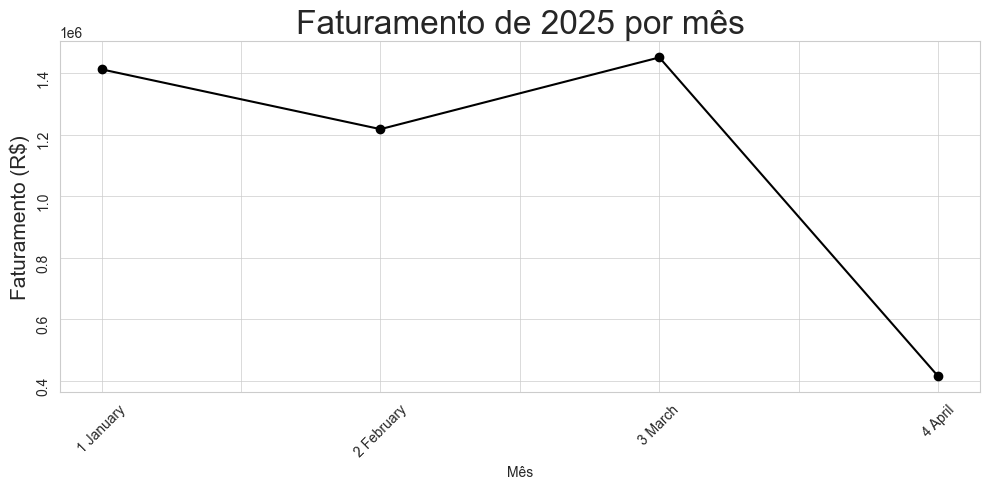

In [39]:
#plotagem do gráfico

plt.figure(figsize=(10, 5))

faturamento_mes.plot(kind= 'line', marker= 'o', linestyle = '-', color= 'black')

plt.title("Faturamento de 2025 por mês", fontsize = 24)
plt.ylabel("Faturamento (R$)", fontsize= '15')
plt.xlabel("Mês", fontsize= '10')

plt.xticks(rotation= 45)
plt.yticks(rotation= 90)

plt.grid(True, which = 'both', linestyle = '-', linewidth = 0.5)

plt.tight_layout()
plt.show()

## 8. Análise 3 - Vendas Por Estado

Qual o total de vendas por estado?

In [25]:
df_vendas.head(5)

,ID_Pedido,Data_Pedido,Nome_Produto,Categoria,Preco_Unitario,Quantidade,ID_Cliente,Cidade,Estado,Faturamento,Status_pedido,Mês
0,1000,2026-01-01 12:00:00,Laptop Gamer,Eletrônicos,7500.0,2,112,Porto Alegre,RS,15000.0,Normal,1 January
1,1001,2026-01-01 02:00:00,SSD 1TB,Hardware,600.0,1,136,São Paulo,SP,600.0,Rádipada,1 January
2,1002,2026-01-01 09:00:00,SSD 1TB,Hardware,600.0,7,135,Porto Alegre,RS,4200.0,Normal,1 January
3,1003,2026-01-01 06:00:00,Cadeira Gamer,Móveis,1200.0,1,135,Curitiba,PR,1200.0,Normal,1 January
4,1004,2026-01-01 02:00:00,Cadeira Gamer,Móveis,1200.0,2,106,Curitiba,PR,2400.0,Normal,1 January


In [26]:
#quantidade de vendas por estado
qnt_vendas_estado = df_vendas.groupby("Estado")['Quantidade'].sum().sort_values()
#valor de vendas por estado
vlr_vendas_estado = df_vendas.groupby("Estado")['Faturamento'].sum()

In [27]:
vlr_vendas_estado.shape

(7,)

In [28]:
estado_data = pd.concat([qnt_vendas_estado, vlr_vendas_estado], axis=1)

In [29]:
estado_data

,Quantidade,Faturamento
Estado,,
RJ,244,655761.53
MG,250,588059.55
BA,271,675757.26
PR,280,515183.16
SP,302,599368.27
RS,320,609472.02
CE,322,850684.80


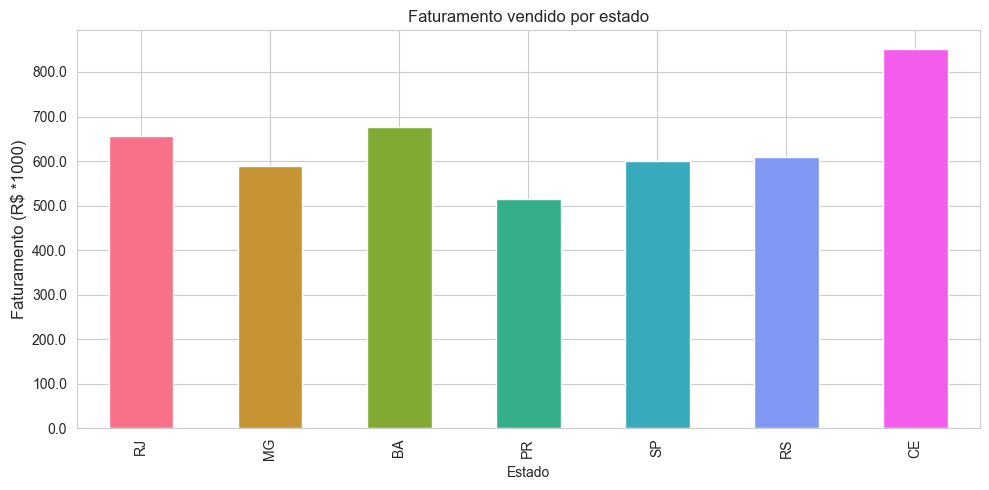

In [61]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_title("Faturamento vendido por estado")
ax.set_ylabel("Faturamento (R$ *1000)", fontsize = 12)

ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x/1000}'))

estado_data["Faturamento"].plot(kind= 'bar', color = sns.color_palette('husl', 7))

plt.tight_layout()
plt.show()

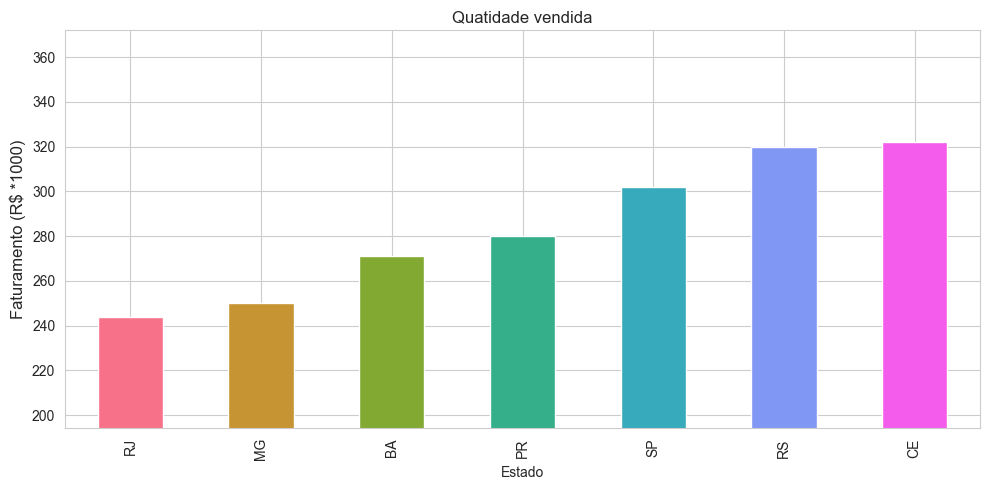

In [60]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_title("Quatidade vendida por estado")
ax.set_ylabel("Faturamento (R$ *1000)", fontsize = 12)

#ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x/1000}'))
ax.set_ylim(bottom=estado_data["Quantidade"].min() - 50, top= estado_data["Quantidade"].max() + 50)

estado_data["Quantidade"].plot(kind= 'bar', color = sns.color_palette('husl', 7))

plt.tight_layout()
plt.show()

In [31]:
df_vendas.head(5)

,ID_Pedido,Data_Pedido,Nome_Produto,Categoria,Preco_Unitario,Quantidade,ID_Cliente,Cidade,Estado,Faturamento,Status_pedido,Mês
0,1000,2026-01-01 12:00:00,Laptop Gamer,Eletrônicos,7500.0,2,112,Porto Alegre,RS,15000.0,Normal,1 January
1,1001,2026-01-01 02:00:00,SSD 1TB,Hardware,600.0,1,136,São Paulo,SP,600.0,Rádipada,1 January
2,1002,2026-01-01 09:00:00,SSD 1TB,Hardware,600.0,7,135,Porto Alegre,RS,4200.0,Normal,1 January
3,1003,2026-01-01 06:00:00,Cadeira Gamer,Móveis,1200.0,1,135,Curitiba,PR,1200.0,Normal,1 January
4,1004,2026-01-01 02:00:00,Cadeira Gamer,Móveis,1200.0,2,106,Curitiba,PR,2400.0,Normal,1 January


In [32]:
#faturamento por categoria
faturamento_categoria= df_vendas.groupby('Categoria')['Faturamento'].sum()

In [33]:
faturamento_categoria.map('R${:,.2f}'.format)

Categoria
Acessórios       R$425,986.59
Eletrônicos    R$2,434,800.00
Hardware       R$1,394,700.00
Móveis           R$238,800.00
Name: Faturamento, dtype: object

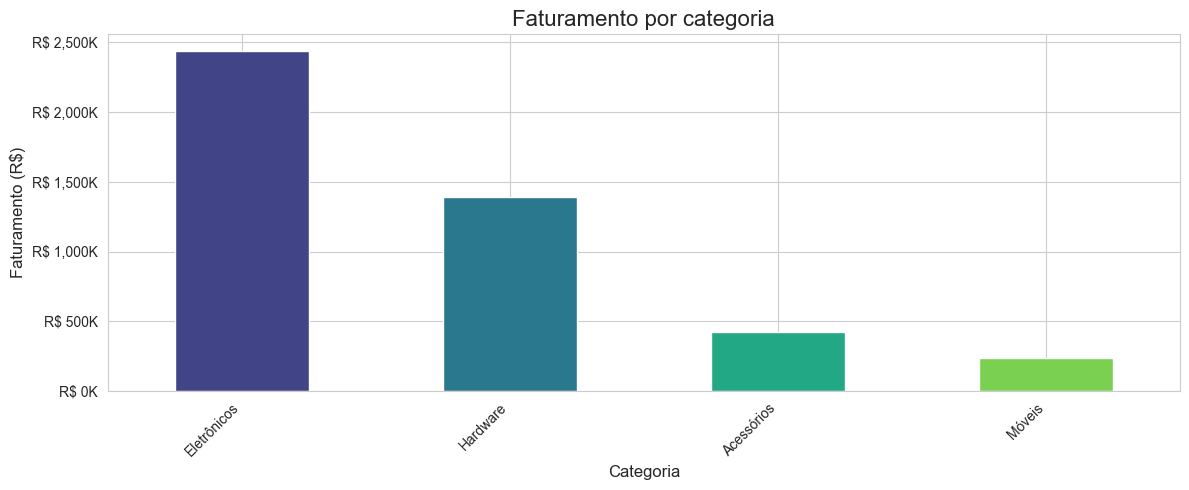

In [62]:
from matplotlib.ticker import FuncFormatter

faturamento_categoria_ordenado = faturamento_categoria.sort_values(ascending=False)

#cria a figura e os eixos da figura
fig, ax = plt.subplots(figsize= (12, 5))

def formatador_milhares(y, pos):
    """Formata o valor em milhares (k) com cifrão R$"""
    return f'R$ {y/1000:,.0f}K'

formater = FuncFormatter(formatador_milhares)

ax.yaxis.set_major_formatter(formater)

faturamento_categoria_ordenado.plot(kind= 'bar', ax = ax, color= sns.color_palette('viridis', len(faturamento_categoria_ordenado)))

ax.set_title('Faturamento por categoria', fontsize = 16)
ax.set_ylabel("Faturamento (R$)", fontsize = 12)
ax.set_xlabel("Categoria", fontsize = 12)

plt.xticks(rotation = 45, ha='right')

plt.tight_layout()
plt.show()
